In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd  # Para el manejo de datos en forma de marcos de datos (DataFrames)
import matplotlib.pyplot as plt  # Para la visualización de datos mediante gráficos
import seaborn as sns  # Para mejorar la estética de los gráficos
from tabulate import tabulate  # Para mostrar los datos en forma de tabla
import numpy as np  # Para operaciones numéricas

# Ruta del archivo Excel que contiene los datos
file_path = ('/content/drive/MyDrive/Informe Digital Analyst Challenge/Digital Analysts- Analytics Test.xlsx')
df = pd.read_excel(file_path)  # Cargar los datos desde el archivo Excel a un DataFrame de pandas

In [ ]:
# Contar el número de datos duplicados en las columnas 'check_id' e 'id'
duplicates_check_id = df.duplicated(subset=['check_id']).sum()
duplicates_id = df.duplicated(subset=['id']).sum()

# Crear una lista de listas con los datos duplicados
datos = [["check_id", duplicates_check_id], ["id", duplicates_id]]

# Encabezados de la tabla
encabezados = ["Columna", "Cantidad"]

# Imprimir la tabla de datos duplicados
print('|--- Datos duplicados ---|')
print(tabulate(datos, headers=encabezados, tablefmt="grid", numalign="center", stralign="center", colalign=("center", "center"), showindex=False))

|--- Datos duplicados ---|
+-----------+------------+
|  Columna  |  Cantidad  |
+===========+============+
| check_id  |     0      |
+-----------+------------+
|    id     |     0      |
+-----------+------------+


In [ ]:
# Seleccionar las columnas de interés que se desean conservar
columns_to_keep = ['id', 'identity_status', 'score', 'score_criminal_background', 'keywords_criminal', 'score_traffic_fines', 'fines_count', 'score_financial_background', 'financial_status']

# Filtrar el DataFrame para incluir solo las columnas de interés
df = df[columns_to_keep]

# Ahora, 'df' contiene solo las columnas que son relevantes para el análisis
# Los datos irrelevantes han sido eliminados

In [ ]:
# Seleccionar las columnas de interés que se desean conservar en un nuevo DataFrame 'df2'
columns_to_keep = ['id', 'identity_status', 'score', 'score_criminal_background', 'keywords_criminal', 'score_traffic_fines', 'score_financial_background']
df2 = df[columns_to_keep]

# Verificar la cantidad de datos faltantes en cada columna del nuevo DataFrame 'df2'
missing_data = df2.isnull().sum()

# Crear una lista de listas con los datos faltantes
datos = list(zip(missing_data.index, missing_data.values))

# Encabezados de la tabla
encabezados = ["Columna", "Cantidad"]

# Imprimir la tabla con el título 'Datos faltantes'
print('|' + '-'*12,'Datos faltantes', '-'*12 + '|')
print(tabulate(datos, headers=encabezados, tablefmt="grid", numalign="center", stralign="center", colalign=("center", "center"), showindex=False))

|------------ Datos faltantes ------------|
+----------------------------+------------+
|          Columna           |  Cantidad  |
+============================+============+
|             id             |     0      |
+----------------------------+------------+
|      identity_status       |     0      |
+----------------------------+------------+
|           score            |     0      |
+----------------------------+------------+
| score_criminal_background  |     0      |
+----------------------------+------------+
|     keywords_criminal      |    917     |
+----------------------------+------------+
|    score_traffic_fines     |     0      |
+----------------------------+------------+
| score_financial_background |     0      |
+----------------------------+------------+


In [ ]:
# Definir el rango [0, 1] para identificar valores atípicos
lower_bound = 0
upper_bound = 1

# Identificar valores atípicos para cada columna seleccionada
outliers = ((df[['score', 'score_criminal_background', 'score_traffic_fines', 'score_financial_background']] < lower_bound) | (df[['score', 'score_criminal_background', 'score_traffic_fines', 'score_financial_background']] > upper_bound)).sum()

# Crear una lista de listas con los datos de valores atípicos
datos = list(zip(outliers.index, outliers.values))

# Encabezados de la tabla
encabezados = ["Columna", "Cantidad"]

# Imprimir la tabla con el título 'Valores atípicos'
print('|' + '-'*12,'Valores atípicos', '-'*11 + '|')
print(tabulate(datos, headers=encabezados, tablefmt="grid", numalign="center", stralign="center", colalign=("center", "center"), showindex=False))

|------------ Valores atípicos -----------|
+----------------------------+------------+
|          Columna           |  Cantidad  |
+============================+============+
|           score            |     0      |
+----------------------------+------------+
| score_criminal_background  |     0      |
+----------------------------+------------+
|    score_traffic_fines     |     0      |
+----------------------------+------------+
| score_financial_background |     0      |
+----------------------------+------------+


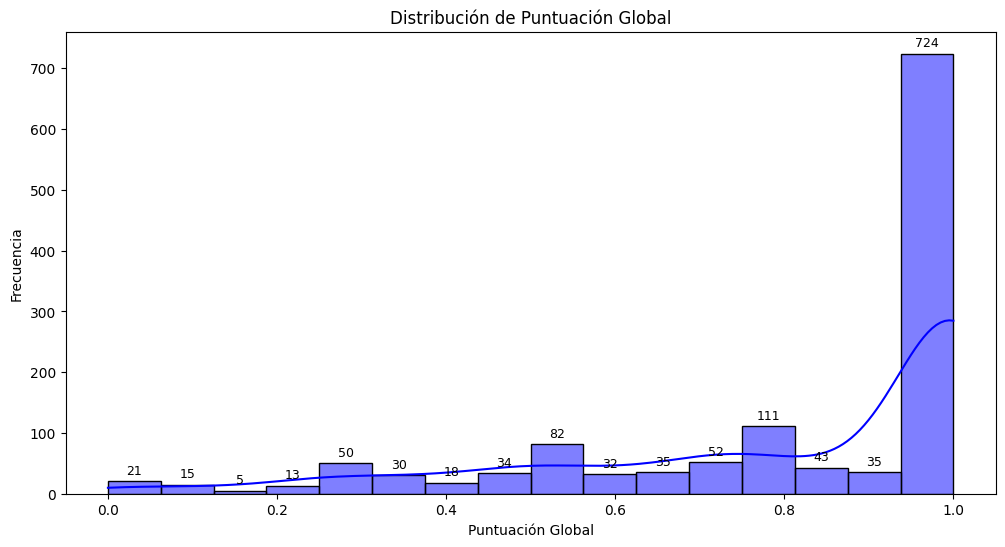

In [ ]:
# Crear un gráfico de histograma para la distribución de la puntuación global
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['score'], kde=True, color='blue')

# Agregar etiquetas y título al gráfico
plt.title('Distribución de Puntuación Global')
plt.xlabel('Puntuación Global')
plt.ylabel('Frecuencia')

# Agregar el valor numérico en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

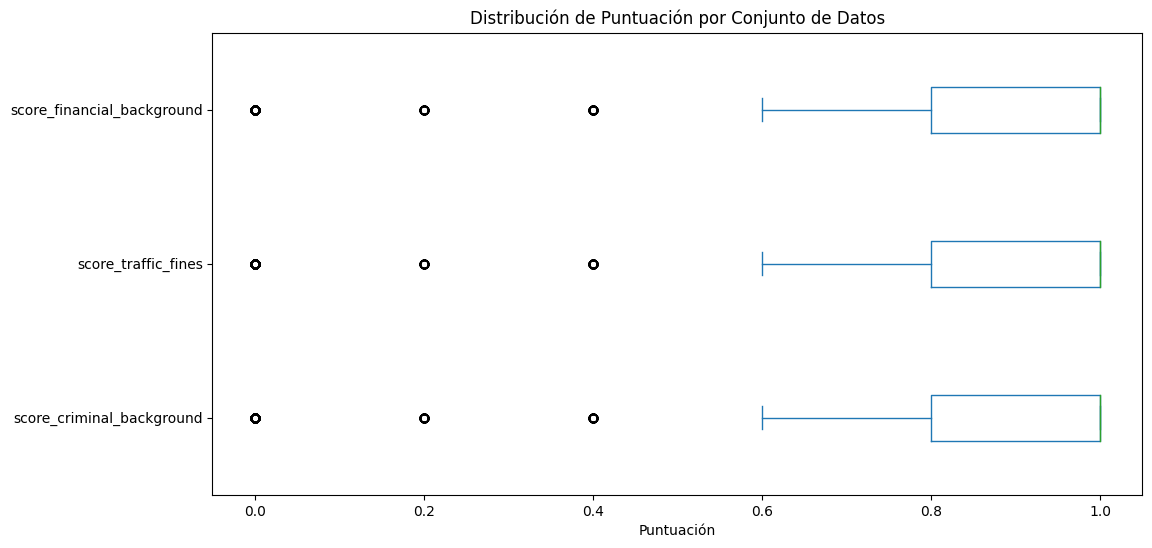

In [ ]:
# Lista de conjuntos de datos para los cuales se mostrará la distribución de puntuación
datasets = ['score_criminal_background', 'score_traffic_fines', 'score_financial_background']

# Crear un gráfico de caja horizontal para la distribución de puntuación en los conjuntos de datos seleccionados
df[datasets].plot(kind='box', vert=False, figsize=(12, 6))

# Agregar etiquetas y título al gráfico
plt.title('Distribución de Puntuación por Conjunto de Datos')
plt.xlabel('Puntuación')

# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener la cantidad de checks para cada estado en la columna 'identity_status'
values_status = df['identity_status'].value_counts()

# Filtrar los checks que tienen posible fraude de identidad ('not_found' o 'dead')
possible_fraud_checks = df[df['identity_status'].isin(['not_found', 'dead'])]

# Crear una lista de listas con los datos de la cantidad de checks por estado
datos = list(zip(values_status.index, values_status.values))

# Encabezados de la tabla
encabezados = ["Estado", "Cantidad"]

# Imprimir la tabla con el título 'Valores status'
print('|' + '-'*4,'Valores status', '-'*4 + '|')
print(tabulate(datos, headers=encabezados, tablefmt="grid", numalign="center", stralign="center", colalign=("center", "center"), showindex=False))

# Imprimir el número total de checks con posible fraude
print(f'Número de checks con posible fraude: {len(possible_fraud_checks)}')

|---- Valores status ----|
+-----------+------------+
|  Estado   |  Cantidad  |
+===========+============+
|   found   |    1290    |
+-----------+------------+
| not_found |     7      |
+-----------+------------+
|   dead    |     3      |
+-----------+------------+
Número de checks con posible fraude: 10


In [ ]:
# Filtrar el DataFrame para las filas donde los nombres de entrada y encontrados no son iguales y el estado de identidad es 'not_found'
non_matching_and_not_found = df[(df['input names'] != df['found names']) & (df['identity_status'] == 'not_found')]

# Imprimir la cantidad de filas que cumplen con las condiciones
print(f"Cantidad de filas con nombres diferentes \ny identity_status igual a 'not_found': {len(non_matching_and_not_found)}")

Cantidad de filas con nombres diferentes 
y identity_status igual a 'not_found': 7


In [ ]:
# Filtrar los checks que son rechazados según ciertos criterios
rejected_checks = df[
    (df['score'] < 0.8) |          # checks con puntuación menor a 0.8
    (df['keywords_criminal'].notna()) |  # checks con palabras clave criminales presentes
    (df['identity_status'].isin(['not_found', 'dead']))  # checks con estado de identidad 'not_found' o 'dead'
]

# Calcular la tasa de aceptación y rechazo
acceptance_rate = 1 - len(rejected_checks) / len(df)
rejection_rate = 1 - acceptance_rate

# Imprimir las tasas en formato porcentual
print(f"Tasa de aceptación: {acceptance_rate:.2%}")
print(f"Tasa de rechazo: {rejection_rate:.2%}")

Tasa de aceptación: 60.08%
Tasa de rechazo: 39.92%


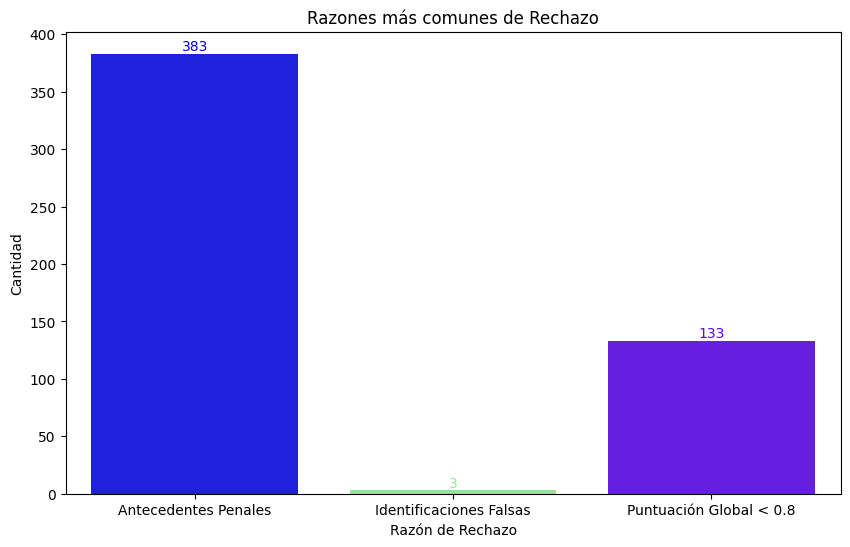

In [ ]:
# Razones más comunes de rechazo
rejection_reasons = []

# 1. Antecedentes penales
criminal_rejection_count = rejected_checks[rejected_checks['keywords_criminal'].notna()].shape[0]
rejection_reasons.append(('Antecedentes Penales', criminal_rejection_count))

# 2. Identificaciones falsas (sin antecedentes penales)
fake_identity_rejection_count = rejected_checks[(rejected_checks['identity_status'] == 'dead') & (rejected_checks['keywords_criminal'].isna())].shape[0]
rejection_reasons.append(('Identificaciones Falsas', fake_identity_rejection_count))

# 3. Puntuación global inferior a 0.8 (sin antecedentes penales ni identificaciones falsas)
low_score_rejection_count = rejected_checks[(rejected_checks['score'] < 0.8) & (rejected_checks['keywords_criminal'].isna()) & (rejected_checks['identity_status'] != 'dead')].shape[0]
rejection_reasons.append(('Puntuación Global < 0.8', low_score_rejection_count))

# Crear un DataFrame con las razones de rechazo
rejection_df = pd.DataFrame(rejection_reasons, columns=['Razón de Rechazo', 'Cantidad'])

# Configurar colores personalizados para las columnas
colors = ['blue', 'lightgreen', '#5c00ff']

# Graficar con etiquetas en las barras y colores personalizados
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Razón de Rechazo', y='Cantidad', data=rejection_df, palette=colors)
plt.title('Razones más comunes de Rechazo')
plt.xlabel('Razón de Rechazo')
plt.ylabel('Cantidad')

# Añadir etiquetas en las barras
for index, value in enumerate(rejection_df['Cantidad']):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', color=colors[index])

plt.show()

Porcentaje de gigsters con antecedente criminal: 29.46% 



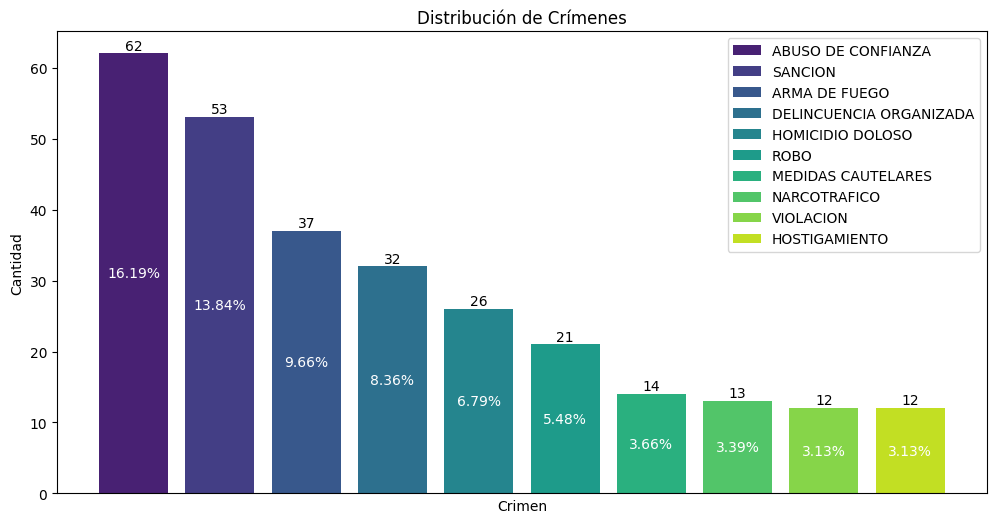

In [ ]:
# Obtener la cantidad de ocurrencias para cada valor único en 'keywords_criminal'
values_criminal = df['keywords_criminal'].value_counts()

# Calcular el porcentaje de gigsters con antecedente criminal respecto a la muestra total
porcentaje_keywords_criminal = (df['keywords_criminal'].notna().sum() / len(df))

# Crear una lista de listas con los datos y porcentajes para los 10 valores más frecuentes
datos = []
total_criminal = len(df[df['keywords_criminal'].notna()])

for index, count in values_criminal.head(10).items():
    percentage = (count / total_criminal) * 100
    datos.append((index, count, percentage))

# Obtener colores para las barras utilizando una paleta de colores de Seaborn
colors = sns.color_palette("viridis", len(datos))

# Graficar los valores utilizando la función bar de Matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(x=range(len(datos)), height=[item[1] for item in datos], color=colors)

# Configurar el título y etiquetas del gráfico
plt.title('Distribución de Crímenes')
plt.ylabel('Cantidad')
plt.xlabel('Crimen')

# Desactivar las etiquetas en el eje x
plt.xticks([])

# Añadir etiquetas en las barras para el porcentaje y la cantidad
for bar, item in zip(bars, datos):
    index, count, percentage = item
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{percentage:.2f}%",
             ha='center', va='center', color='white', fontsize=10)

    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count),
             ha='center', va='bottom', color='black', fontsize=10)

# Crear la leyenda fuera del gráfico con los nombres de los crímenes
plt.legend(bars, [f"{item[0]}" for item in datos], bbox_to_anchor=(1, 1), loc='upper right')

# Imprimir el porcentaje de gigsters con antecedente criminal
print(f"Porcentaje de gigsters con antecedente criminal: {porcentaje_keywords_criminal:.2%} \n")

# Mostrar el gráfico
plt.show()

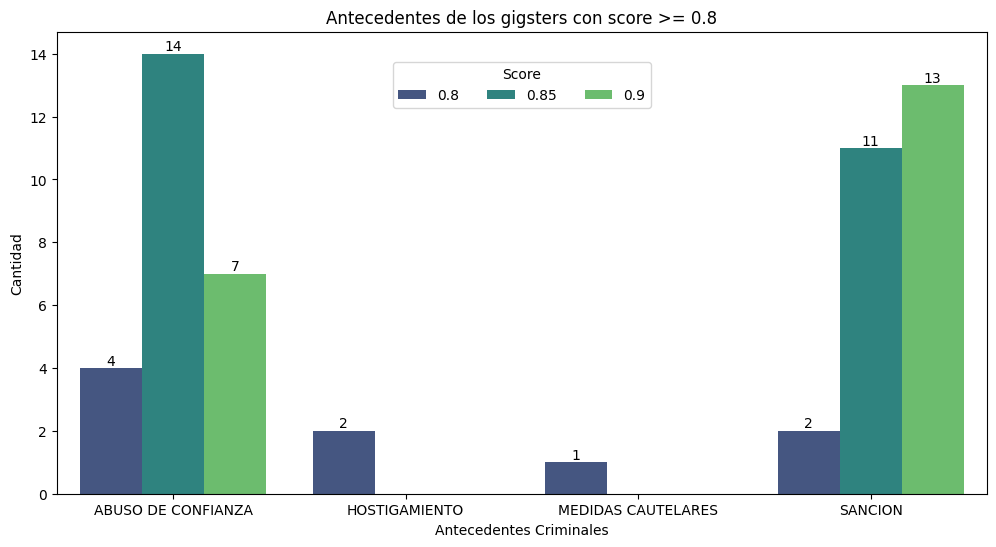

In [ ]:
# Filtrar el DataFrame para incluir solo los datos con score >= 0.8 y keywords_criminal no nulo
filtered_data = df[(df['score'] >= 0.8) & (df['keywords_criminal'].notna())]

# Obtener conteo de repeticiones para cada combinación de 'score' y 'keywords_criminal'
value_counts = filtered_data.groupby(['score', 'keywords_criminal']).size().reset_index(name='Cantidad')

# Redondear el valor de 'score' a dos decimales para una presentación más limpia
value_counts['score'] = value_counts['score'].round(2)

# Obtener colores para las barras utilizando una paleta de colores de Seaborn
colors = sns.color_palette("viridis", n_colors=len(value_counts['score'].unique()))

# Graficar los valores utilizando la función barplot de Seaborn
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='keywords_criminal', y='Cantidad', hue='score', data=value_counts, palette=colors)
plt.title('Antecedentes de los gigsters con score >= 0.8')
plt.xlabel('Antecedentes Criminales')
plt.ylabel('Cantidad')

# Mover la leyenda al centro superior del gráfico
plt.legend(title='Score', bbox_to_anchor=(0.5, 0.95), loc='upper center', ncol=3)

# Añadir etiquetas en las barras con la cantidad de repeticiones
for p in barplot.patches:
    height = p.get_height()
    if not np.isnan(height):  # Verificar si el valor no es NaN
        barplot.annotate(str(int(height)), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
# Filtrar datos para incluir solo aquellos con score >= 0.8 y financial_status no nulo
filtered_data = df[(df['score'] >= 0.8) & (df['financial_status'].notna())]

# Obtener la cantidad de ocurrencias para cada valor único en 'financial_status'
values_financial_status = filtered_data['financial_status'].value_counts()

# Crear una lista de listas con los datos y porcentajes para los valores únicos
datos = []
total_financial_status = len(filtered_data)

for index, count in values_financial_status.items():
    percentage = (count / total_financial_status) * 100
    datos.append((index, count, percentage))

# Encabezados de la tabla
encabezados = ["Estado Financiero", "Cantidad", "Porcentaje"]

# Imprimir la tabla con el título 'Distribución de Estados Financieros'
titulo = "Distribución de Estados Financieros"
print('|' + '-'*6, titulo, '-'*6 + '|')
print(tabulate(datos, headers=encabezados, tablefmt="grid", numalign="center", stralign="center", colalign=("center", "center", "center"), showindex=False, floatfmt=".2f"))

|------ Distribución de Estados Financieros ------|
+---------------------+------------+--------------+
|  Estado Financiero  |  Cantidad  |  Porcentaje  |
+=====================+============+==============+
|      SIN MORA       |    766     |    91.74     |
+---------------------+------------+--------------+
|   MORA > 3 MESES    |     53     |     6.35     |
+---------------------+------------+--------------+
|    MORA > 1 AÑO     |     7      |     0.84     |
+---------------------+------------+--------------+
|    MORA > 3 AÑOS    |     6      |     0.72     |
+---------------------+------------+--------------+
|   MORA > 6 MESES    |     3      |     0.36     |
+---------------------+------------+--------------+


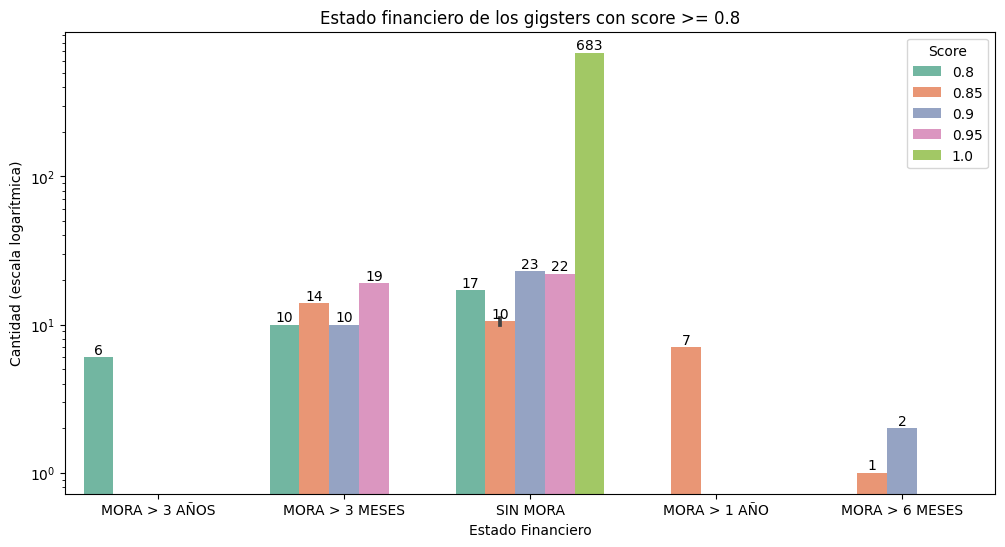

In [ ]:
# Filtrar el DataFrame para incluir solo aquellos con score >= 0.8
filtered_data_score = df[df['score'] >= 0.8]

# Obtener conteo de repeticiones para cada combinación de 'score' y 'financial_status'
value_counts = filtered_data_score.groupby(['score', 'financial_status']).size().reset_index(name='Cantidad')

# Redondear el valor de 'score' a dos decimales para una presentación más limpia
value_counts['score'] = value_counts['score'].round(2)

# Configurar el gráfico de barras con escala logarítmica en el eje y
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set2", n_colors=len(value_counts['score'].unique()))
barplot = sns.barplot(x='financial_status', y='Cantidad', hue='score', data=value_counts, palette=colors, log=True)

# Configurar el título y etiquetas del gráfico
plt.title("Estado financiero de los gigsters con score >= 0.8")
plt.xlabel('Estado Financiero')
plt.ylabel('Cantidad (escala logarítmica)')

# Mover la leyenda al centro superior del gráfico
plt.legend(title='Score', bbox_to_anchor=(1, 1), loc='upper right')

# Añadir etiquetas en las barras con la cantidad de repeticiones
for p in barplot.patches:
    height = p.get_height()
    if not np.isnan(height):  # Verificar si el valor no es NaN
        barplot.annotate(str(int(height)), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

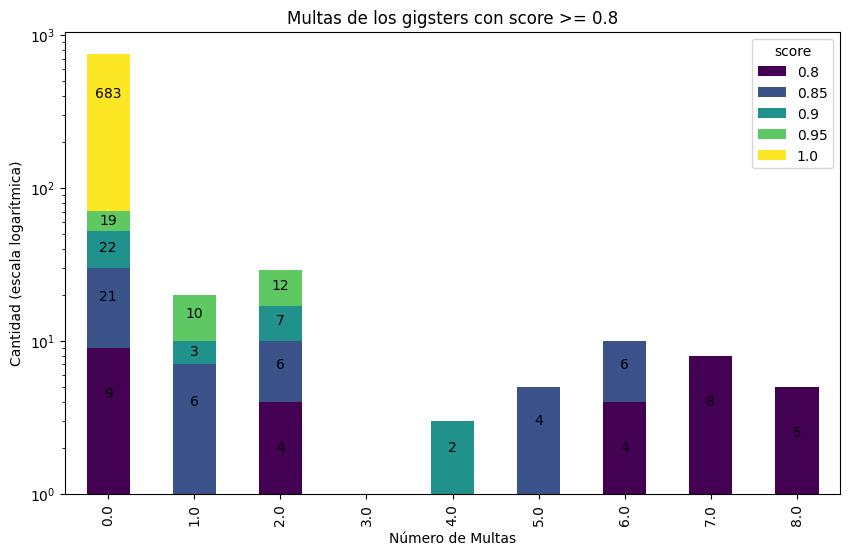

In [ ]:
# Filtrar el DataFrame para incluir solo aquellos con score >= 0.8
filtered_data_score = df[df['score'] >= 0.8].copy()

# Redondear el valor de 'score' a dos decimales para una presentación más limpia
filtered_data_score.loc[:, 'score'] = filtered_data_score['score'].round(2)

# Contar la cantidad de casos para cada combinación de 'fines_count' y 'score'
score_count_relation = filtered_data_score.groupby(['fines_count', 'score']).size().unstack().fillna(0)

# Configurar el gráfico de barras apiladas con escala logarítmica en el eje y
ax = score_count_relation.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', logy=True)

# Configurar el título y etiquetas del gráfico
plt.title("Multas de los gigsters con score >= 0.8")
plt.xlabel('Número de Multas')
plt.ylabel('Cantidad (escala logarítmica)')

# Colocar los valores en el centro de cada columna
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center', color='black')

# Mostrar el gráfico
plt.show()

In [ ]:
# Filtrar el DataFrame para incluir solo aquellos sin multas, sin antecedentes y sin mora
filtered_data = df[(df['fines_count'] == 0) & (df['keywords_criminal'].isnull()) & (df['financial_status'] == 'SIN MORA')]

# Calcular el porcentaje en relación con el DataFrame original
percentage = (len(filtered_data) / len(df)) * 100

# Mostrar el resultado
print(f"Porcentaje de datos sin multas, sin antecedentes y sin mora: {percentage:.2f}%")

Porcentaje de datos sin multas, sin antecedentes y sin mora: 52.54%
